In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=load_digits()

In [4]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Target')


In [5]:
print(X.shape)

(1797, 64)


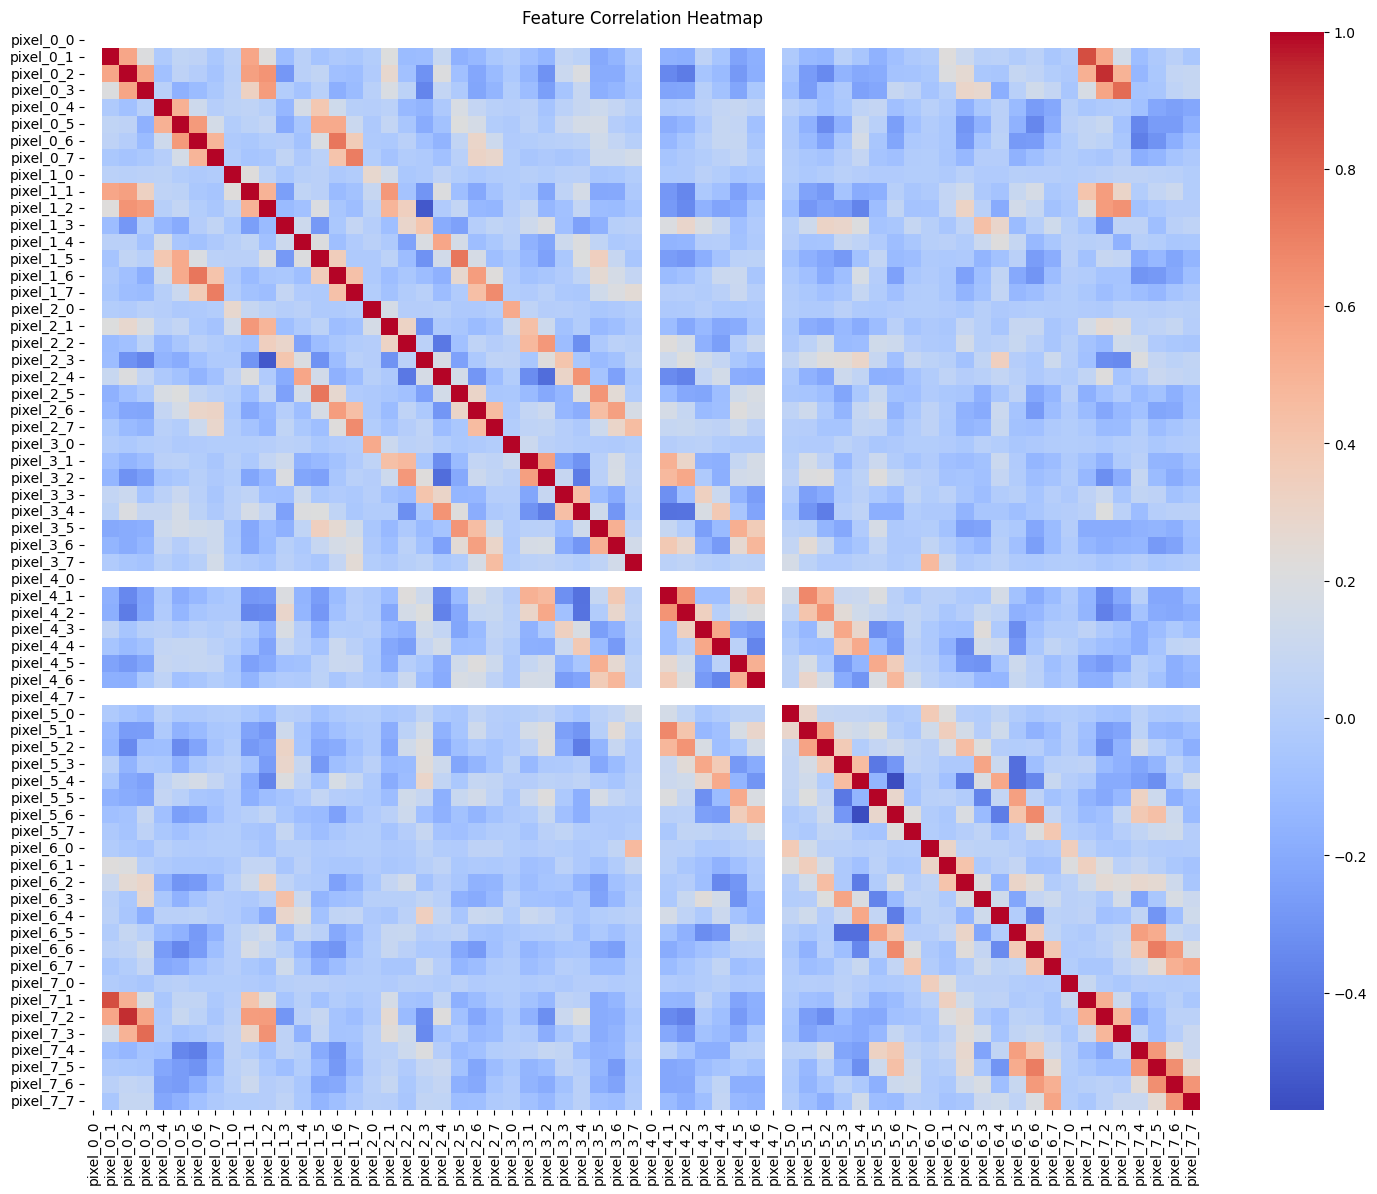

In [6]:
plt.figure(figsize=(18, 14))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


vif_data.sort_values(by="VIF", ascending=False)

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
3,pixel_0_3,36.320437
59,pixel_7_3,33.655142
60,pixel_7_4,26.036806
11,pixel_1_3,25.536011
2,pixel_0_2,24.348704
...,...,...
56,pixel_7_0,1.313141
8,pixel_1_0,1.228590
0,pixel_0_0,NaN
32,pixel_4_0,NaN


Step 3: Standardize the Data
•	Standardize the feature matrix so PCA isn't biased by feature scale.

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 4: Apply PCA and Analyze Explained Variance
•	Use PCA without specifying n_components to keep all components.
•	Plot the cumulative explained variance ratio.
o	How many components are needed to retain:
	90% variance?
	95% variance?

In [16]:

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [21]:
print(X_pca)

[[-1.91421366e+00 -9.54501571e-01 -3.94603482e+00 ... -4.61083312e-17
   0.00000000e+00 -2.93877603e-15]
 [-5.88980330e-01  9.24635800e-01  3.92475494e+00 ...  1.16775688e-15
   0.00000000e+00 -1.93488899e-15]
 [-1.30203906e+00 -3.17188827e-01  3.02333293e+00 ... -3.17442191e-16
   0.00000000e+00 -9.75351406e-16]
 ...
 [-1.02259599e+00 -1.47910870e-01  2.46997365e+00 ... -6.55356241e-16
   0.00000000e+00  1.04336225e-15]
 [-1.07605522e+00 -3.80906254e-01 -2.45548693e+00 ...  5.83100766e-16
   0.00000000e+00 -7.27677060e-16]
 [ 1.25770233e+00 -2.22759088e+00  2.83627891e-01 ... -1.40335314e-16
   0.00000000e+00  1.79706800e-15]]


In [28]:
cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
print(cum_var_ratio)

[0.12033916 0.21594971 0.30039385 0.36537793 0.41397948 0.45612068
 0.49554151 0.52943532 0.55941753 0.58873755 0.61655561 0.64232616
 0.66507919 0.68735099 0.70900328 0.72814495 0.74590042 0.76228111
 0.77824572 0.79313763 0.80661732 0.81933664 0.83099501 0.84157148
 0.85132464 0.86077023 0.86940036 0.87776679 0.88574372 0.89320844
 0.90046426 0.90738337 0.91392246 0.92033038 0.92624422 0.93195585
 0.93719222 0.94201029 0.94654748 0.95077911 0.95483964 0.95881049
 0.96237542 0.9657833  0.96906165 0.97217197 0.97505772 0.97782262
 0.98041436 0.98275919 0.98494176 0.98697774 0.98893286 0.99076605
 0.99244551 0.99405787 0.9955355  0.99688668 0.99813769 0.99917465
 1.         1.         1.         1.        ]


In [ ]:
print(np.count_nonzero(cum_var_ratio>=0.90))
print(np.count_nonzero(cum_var_ratio>=0.95))

34
25


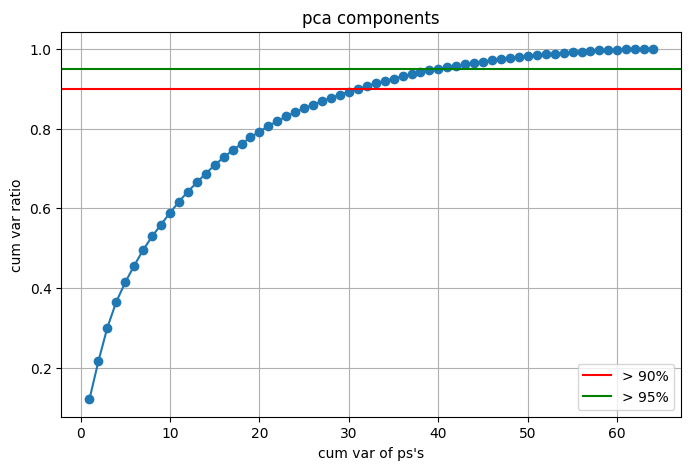

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cum_var_ratio) + 1), cum_var_ratio, marker='o')
plt.xlabel('cum var of ps\'s')
plt.ylabel('cum var ratio')
plt.title('pca components')
plt.axhline(y=0.90, color='r', label='> 90%')
plt.axhline(y=0.95, color='g', label='> 95%')
plt.legend()
plt.grid(True)
plt.show()

Step 5: Choose Optimal Number of Components
•	Based on your plot, choose n_components such that you retain ~95% variance.
•	Transform the dataset accordingly using PCA.


In [39]:

optimal_n_components = n_components_95


pca_optimal = PCA(n_components=optimal_n_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)



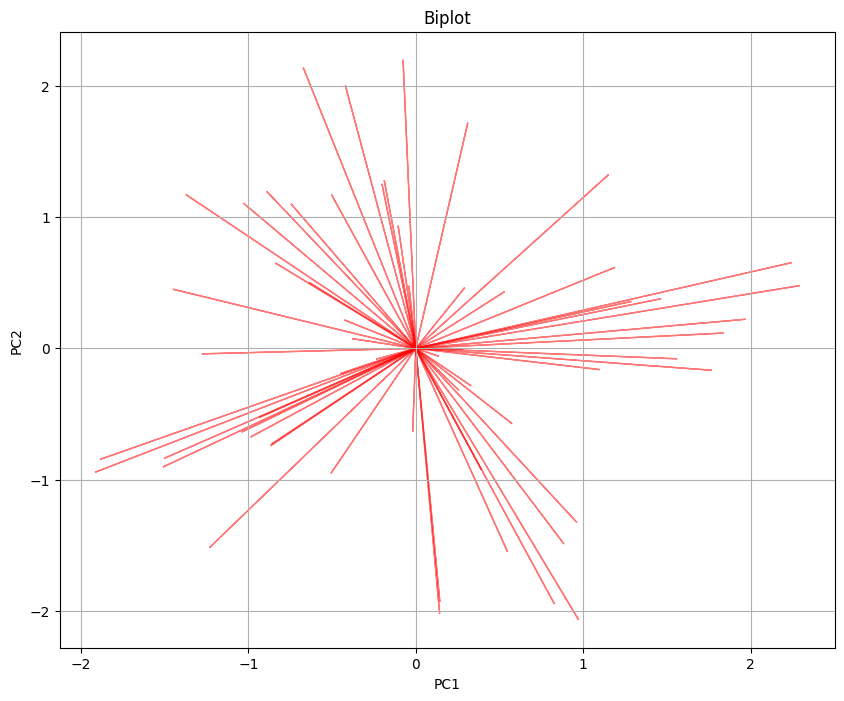

In [48]:
def biplot(score, coeff, labels=None, pc1=0, pc2=1):
    xs = score[:, pc1]
    ys = score[:, pc2]
    plt.figure(figsize=(10, 8))
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i, pc1]*8, coeff[i, pc2]*8, color='r', alpha=0.5)
    plt.xlabel(f"PC{pc1+1}")
    plt.ylabel(f"PC{pc2+1}")
    plt.title("Biplot")
    plt.grid(True)
    plt.show()

biplot(X_pca_optimal, pca_optimal.components_.T, labels=X.columns)